In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Image processing
from PIL import Image


In [2]:
df = pd.read_csv('../Data/age_gender.csv')
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
df.shape

(23705, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [5]:
type(df.pixels[0]) # since pixels are in form of string we need to convert it to an array

str

In [6]:
## Converting pixels into numpy array
df['pixels'] = df['pixels'].apply(lambda x:  np.reshape(np.array(x.split(), dtype="float32"), (48,48)))
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 13..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175..."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79..."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 20..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 21..."


In [7]:
type(df.pixels[0]) 

numpy.ndarray

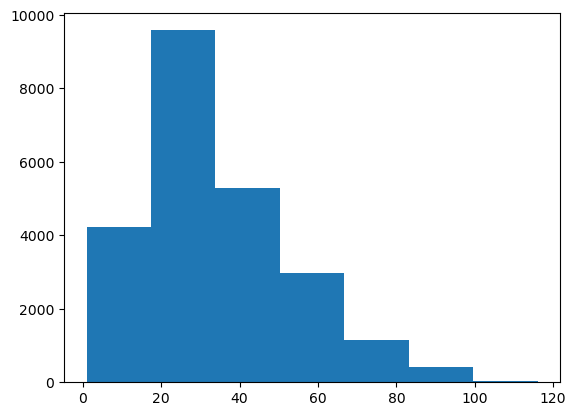

In [8]:
num_bins = 7

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(df.age, num_bins)

plt.show()

In [9]:
df.ethnicity.value_counts()

ethnicity
0    10078
1     4526
3     3975
2     3434
4     1692
Name: count, dtype: int64

In [10]:
df.gender.value_counts()

gender
0    12391
1    11314
Name: count, dtype: int64

In [11]:
eth_values_to_labels = { 0: "White", 1: "Black", 2: "Asian", 3: "Indian", 4: "Hispanic" }
gender_values_to_labels = { 0: "Male", 1: "Female" }

In [12]:
def plot_data(rows, cols, lower_value, upper_value):

    figure = plt.figure(figsize=(cols*3,rows*4))
    for i in range(1, cols*rows + 1):
        k = np.random.randint(lower_value,upper_value)
        figure.add_subplot(rows, cols, i) # adding sub plot

        gender = gender_values_to_labels[df.gender[k]]
        ethnicity = eth_values_to_labels[df.ethnicity[k]]
        age = df.age[k]
        
        im = df.pixels[k]
        # im = np.reshape(im, (48,48))
        plt.imshow(im, cmap='gray')
        plt.axis('off')
        plt.title(f'Gender:{gender}\nAge:{age}\nEthnicity:{ethnicity}')

    plt.tight_layout()
    plt.show()

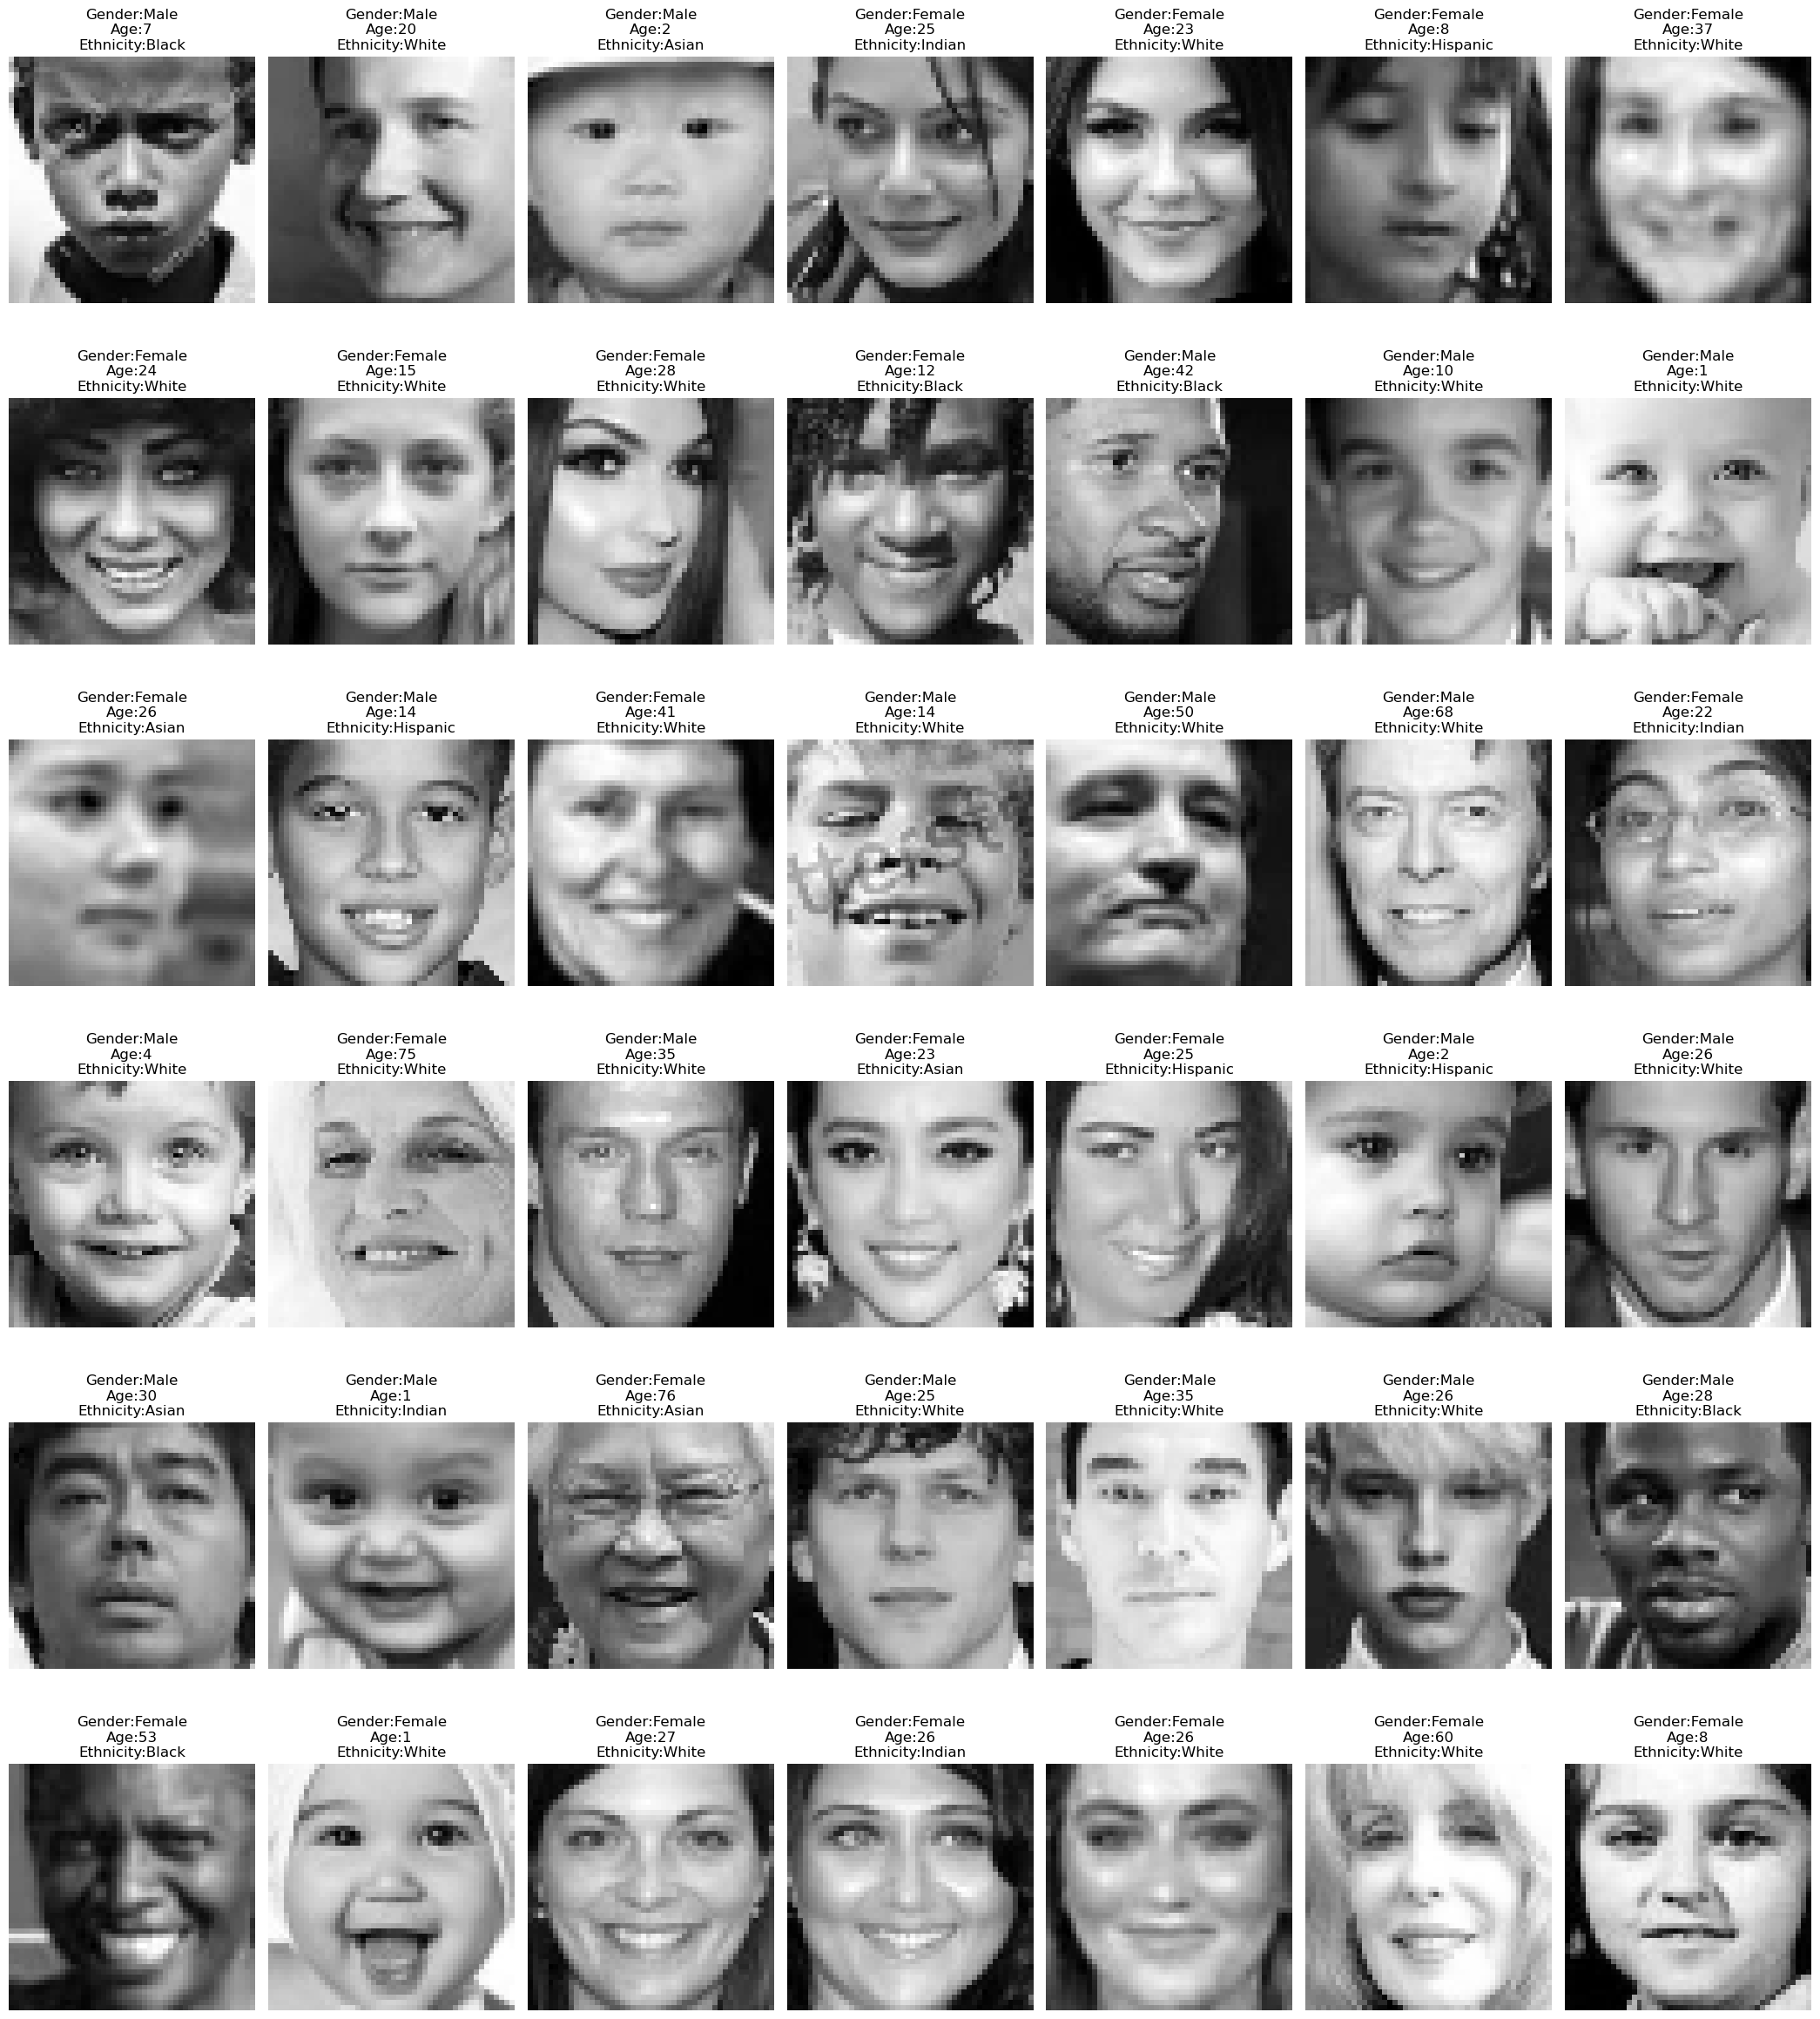

In [13]:
plot_data(rows=6, cols=7, lower_value=0, upper_value=len(df))

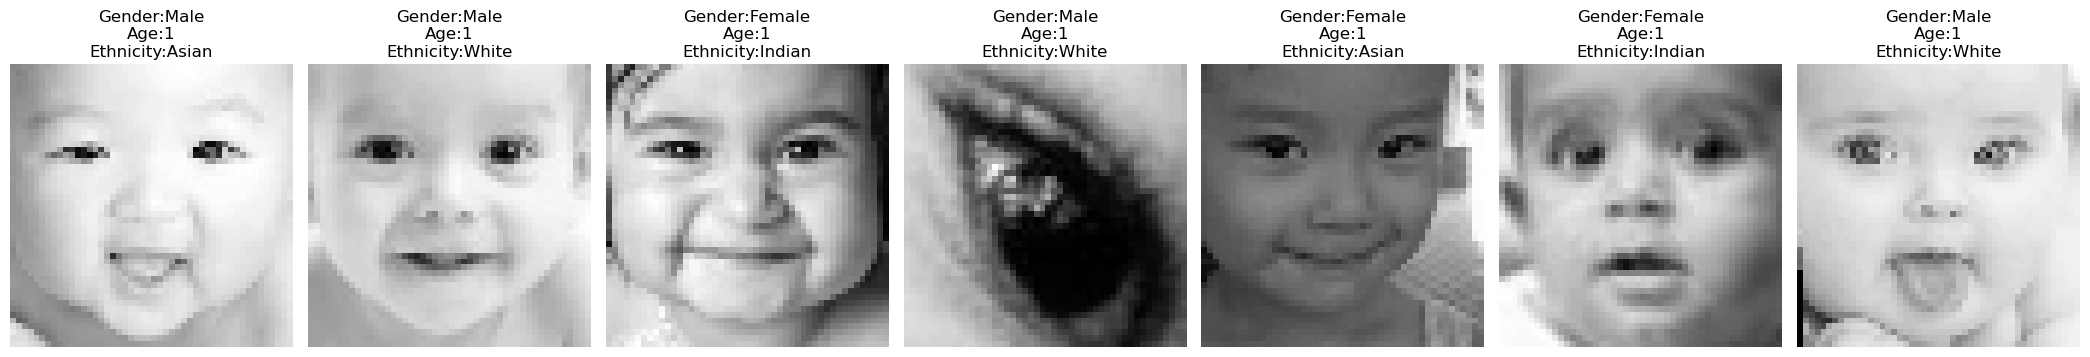

In [14]:
plot_data(rows=1, cols=7, lower_value=0, upper_value=1000)


In [15]:
psum, psum_sq = 0, 0
# pixel count
image_size = 48
count = len(df) * image_size * image_size

# loop through images
for img in df.pixels:
    psum += np.sum(img/255.)
    psum_sq += np.sum((img/255)**2)

# mean, var and std
total_mean = psum / count
total_var  = (psum_sq / count) - (total_mean ** 2)
total_std  = np.sqrt(total_var)

# output
print('[Dataset]')
print(f'- mean: {total_mean}')
print(f'- std: {total_std}')
print(f'- var: {total_var}')

[Dataset]
- mean: 0.49026010990891566
- std: 0.23309824060813472
- var: 0.05433478977460787


In [18]:
df.gender

0        0
1        0
2        0
3        0
4        0
        ..
23700    1
23701    1
23702    1
23703    1
23704    1
Name: gender, Length: 23705, dtype: int64